<class 'pandas.core.frame.DataFrame'>
Index: 10661 entries, 13461 to 159978
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    10661 non-null  object 
 1   state                   10661 non-null  object 
 2   city_or_county          10661 non-null  object 
 3   latitude                10097 non-null  float64
 4   longitude               10097 non-null  float64
 5   congressional_district  10019 non-null  float64
 6   avg_age_participants    10661 non-null  float64
 7   n_participants_child    9735 non-null   float64
 8   n_participants_adult    9735 non-null   float64
 9   n_males                 10084 non-null  float64
 10  n_females               10084 non-null  float64
 11  n_killed                10661 non-null  int64  
 12  n_injured               10661 non-null  int64  
 13  n_arrested              10661 non-null  int64  
 14  n_unharmed              10661 non-null

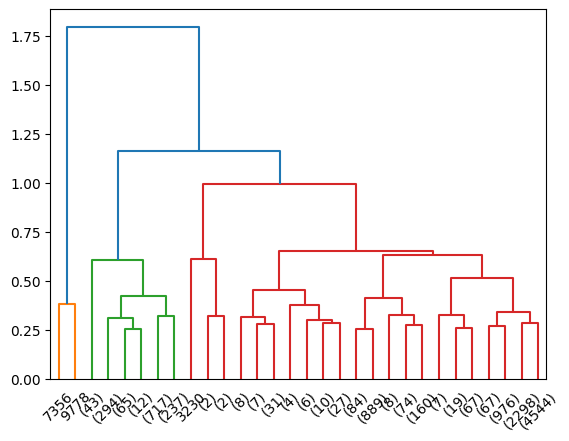

In [48]:
import numpy as np
import pandas as pd


from tqdm.notebook import tqdm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pylab
import matplotlib.patches

import matplotlib.pyplot as plt


#from spicy.spatial.distance import plist
from scipy.spatial.distance import pdist, squareform

#from spicy.stats import mode
from scipy.stats import mode

#from spicy.cluster.hierarchy import linkage, dendogram
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from sklearn.cluster import AgglomerativeClustering 


incidents = pd.read_csv("../data/extracted_features.csv", low_memory=False)



def drop_state(df):
    df = df[df['state'] == "Texas"]
    return df

Texas = drop_state(incidents)

#min_age = Texas['min_age_participants'].median()
#avg_age = Texas['avg_age_participants'].median()
#max_age = Texas['max_age_participants'].median()
age_to_avg = Texas['age_to_average'].median()

#s_for_fill = pd.Series([min_age, avg_age, max_age, age_to_avg], index=['min_age_participants', 'avg_age_participants', 'max_age_participants', 'age_to_average'])
#Texas = Texas.fillna(s_for_fill)

Texas.info()


#Forma normale -- github
selected_features = ['n_participants', 'n_involved', 'age_to_average', 'par_to_tot']
df_aux = Texas[selected_features]
df_aux.head()

scaler = MinMaxScaler()
df_norm = scaler.fit_transform(df_aux.to_numpy())
ndf = pd.DataFrame(df_norm, columns=df_aux.columns)

#fine

data_dist = pdist(df_norm, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, color_threshold=1.0, truncate_mode='lastp')

In [51]:
cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='complete')  
cluster.fit_predict(df_norm)

array([0, 2, 0, ..., 0, 0, 0], dtype=int64)

In [52]:
# Get cluster labels
cluster_labels = cluster.labels_

# Compute silhouette score
silhouette_avg = silhouette_score(df_norm, cluster_labels)
print("The silhouette score is:", silhouette_avg)

The silhouette score is: 0.5607436762624451


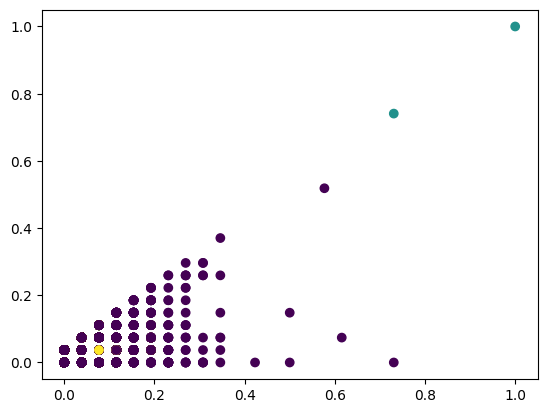

In [53]:
cluster.fit_predict(df_norm)
plt.scatter(ndf['n_participants'], ndf['n_involved'], c=cluster.labels_) 

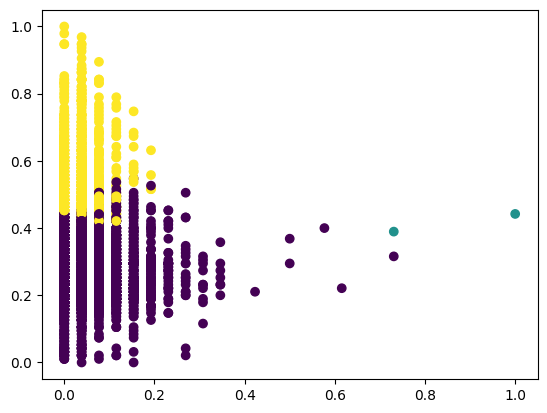

In [13]:
plt.scatter(ndf['n_participants'], ndf['age_to_average'], c=cluster.labels_) 

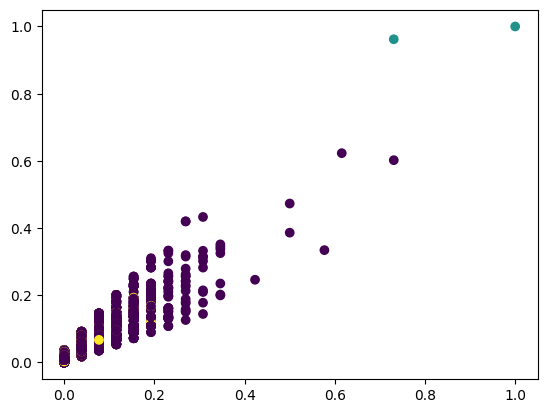

In [14]:
plt.scatter(ndf['n_participants'], ndf['par_to_tot'], c=cluster.labels_) 

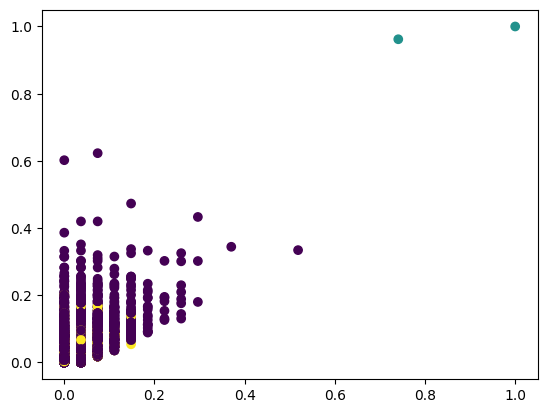

In [15]:
plt.scatter(ndf['n_involved'], ndf['par_to_tot'], c=cluster.labels_) 

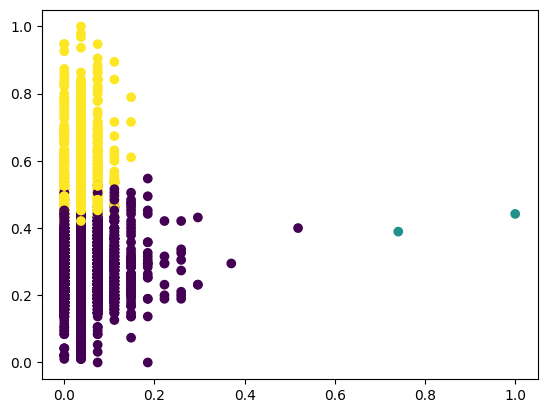

In [16]:
plt.scatter(ndf['n_involved'], ndf['age_to_average'], c=cluster.labels_) 

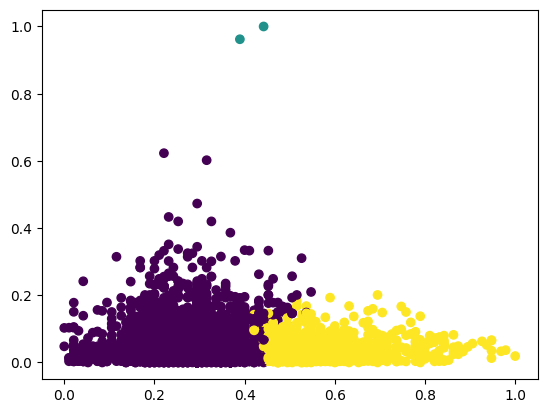

In [17]:
plt.scatter(ndf['age_to_average'], ndf['par_to_tot'], c=cluster.labels_) 

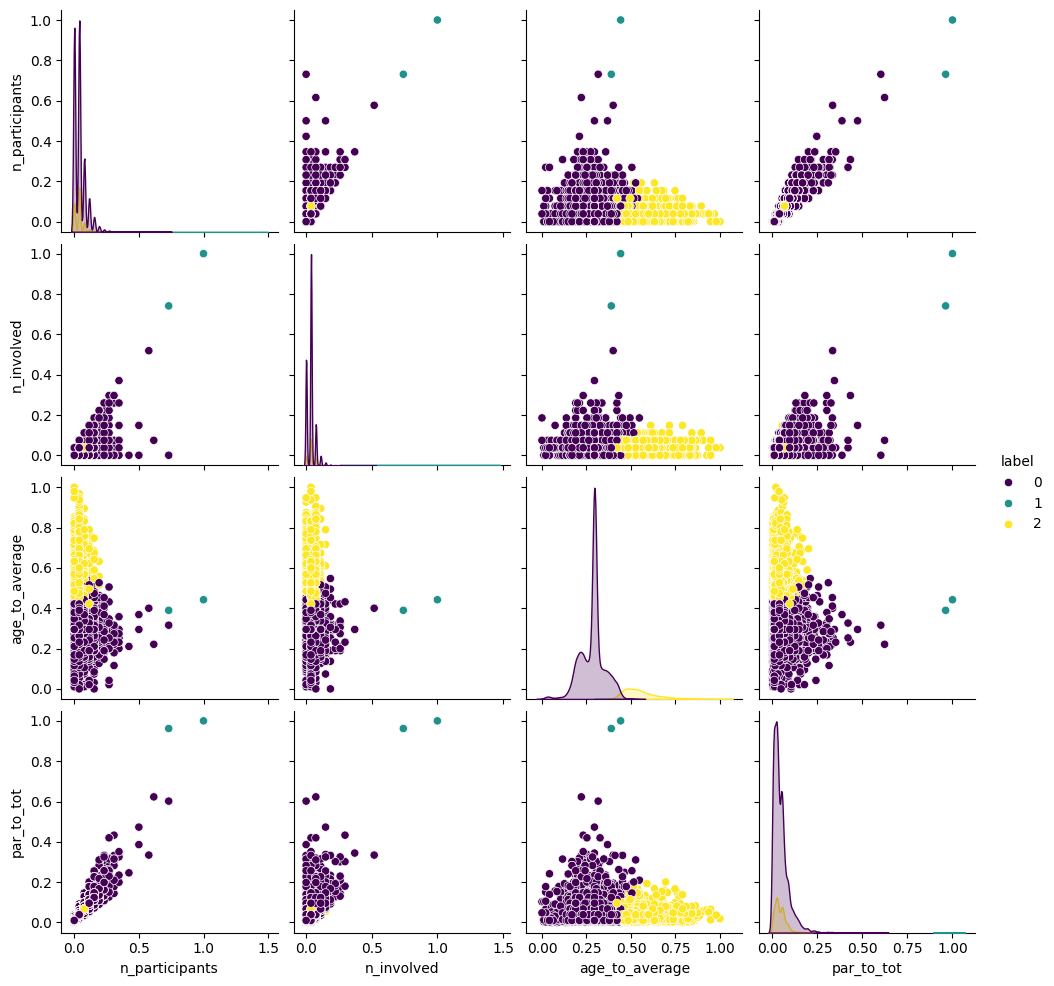

In [65]:
import seaborn as sns
ndf['label'] = cluster.labels_
sns.pairplot(ndf, hue = 'label', palette= 'viridis')
plt.show()

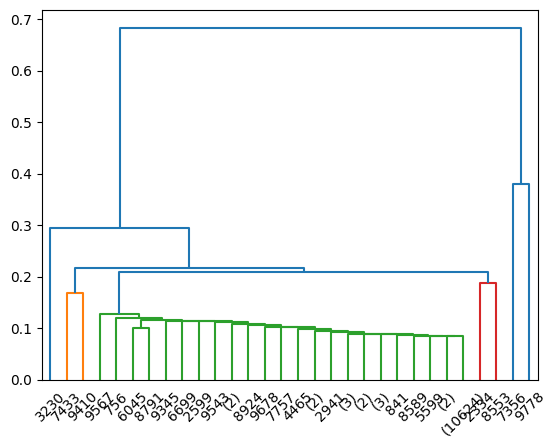

In [66]:
#data_dist = pdist(df_norm, metric = 'euclidean')
data_two_link= linkage(data_dist, method= 'single', metric='euclidean')
res2 = dendrogram(data_two_link, color_threshold=0.20, truncate_mode='lastp')

In [91]:
cluster2 = AgglomerativeClustering(n_clusters=6, metric='euclidean', linkage='single')  
cluster2.fit_predict(df_norm)

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [92]:
# Get cluster labels
cluster_labels = cluster2.labels_

# Compute silhouette score
silhouette_avg = silhouette_score(df_norm, cluster_labels)
print("The silhouette score is:", silhouette_avg)

The silhouette score is: 0.742868713039703


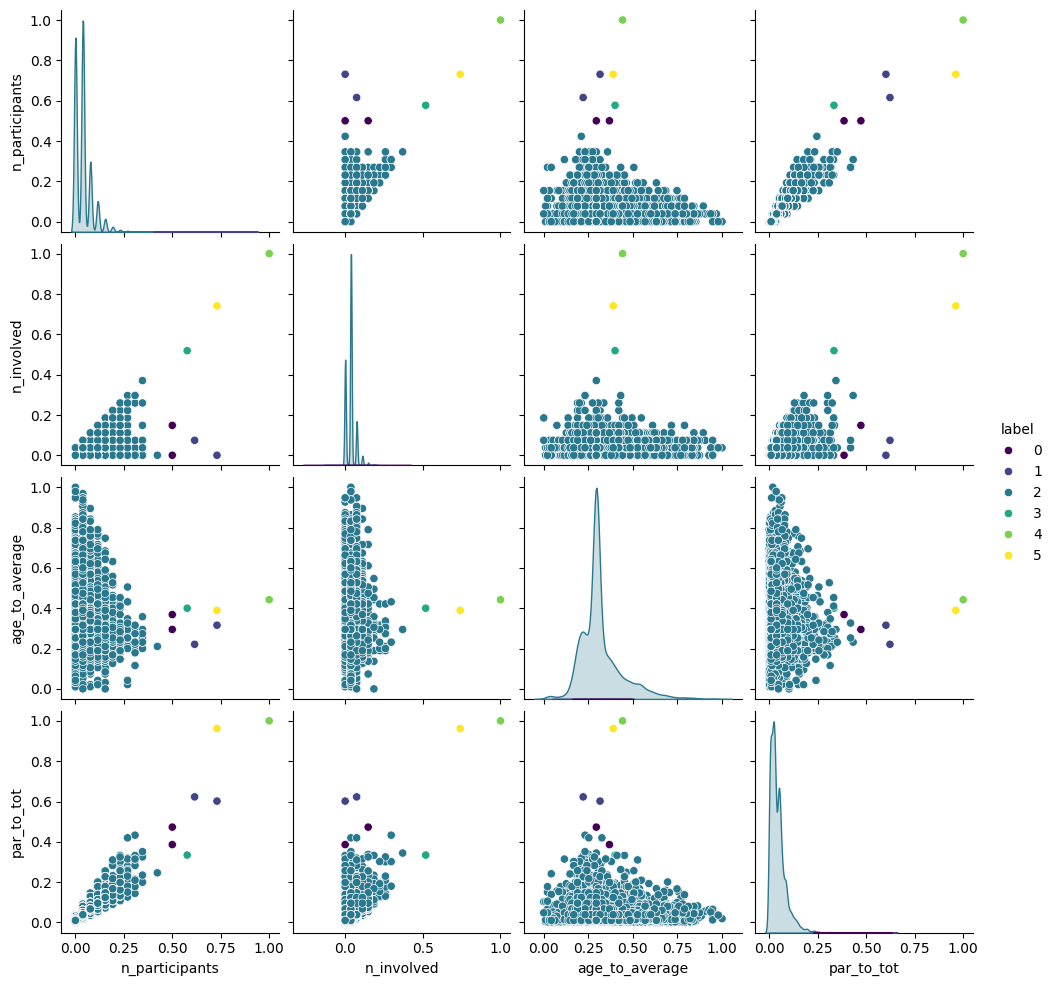

In [94]:
ndf['label'] = cluster_labels
sns.pairplot(ndf, hue = 'label', palette= 'viridis')
plt.show()

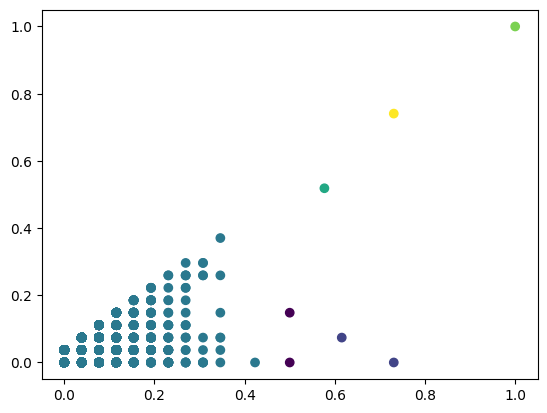

In [68]:
cluster2.fit_predict(df_norm)
plt.scatter(ndf['n_participants'], ndf['n_involved'], c=cluster2.labels_)

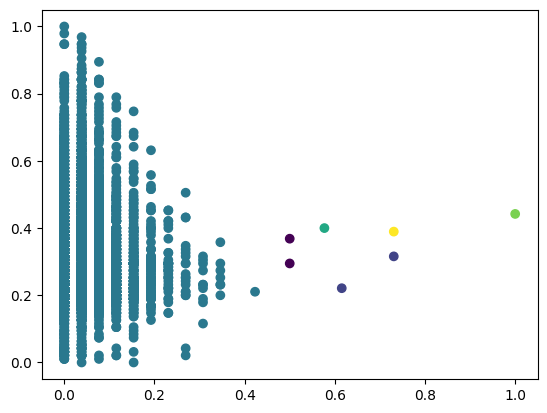

In [69]:
plt.scatter(ndf['n_participants'], ndf['age_to_average'], c=cluster2.labels_)

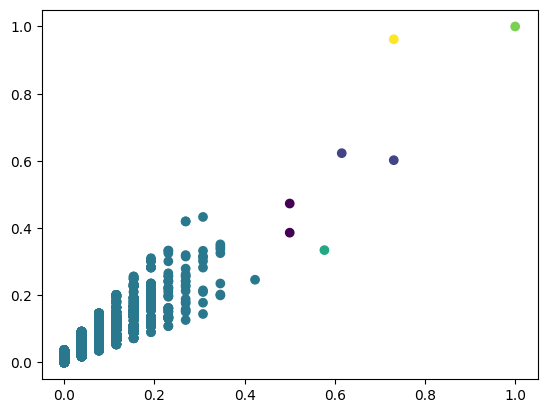

In [70]:
plt.scatter(ndf['n_participants'], ndf['par_to_tot'], c=cluster2.labels_)

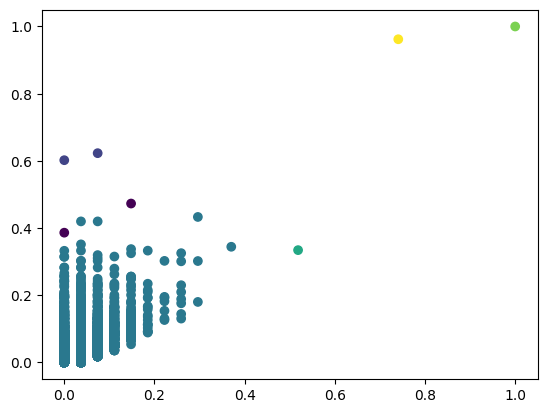

In [71]:
plt.scatter(ndf['n_involved'], ndf['par_to_tot'], c=cluster2.labels_)

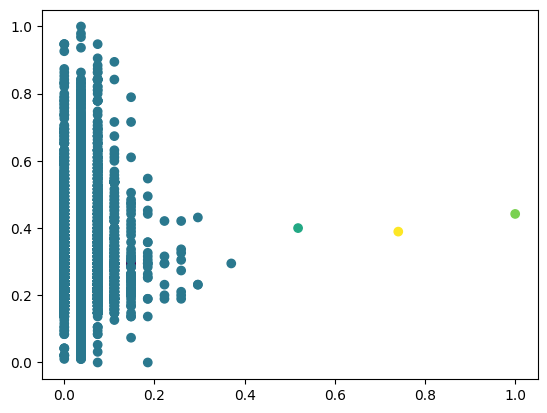

In [72]:
plt.scatter(ndf['n_involved'], ndf['age_to_average'], c=cluster2.labels_)

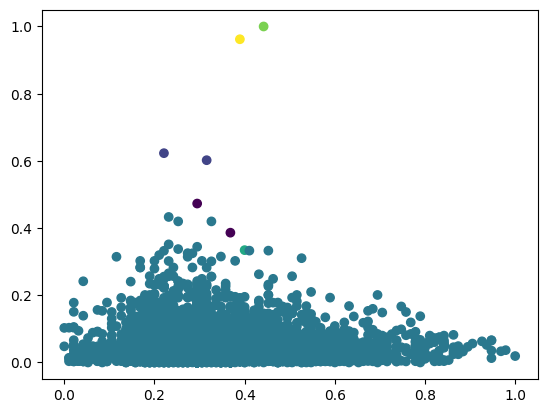

In [73]:
plt.scatter(ndf['age_to_average'], ndf['par_to_tot'], c=cluster2.labels_)

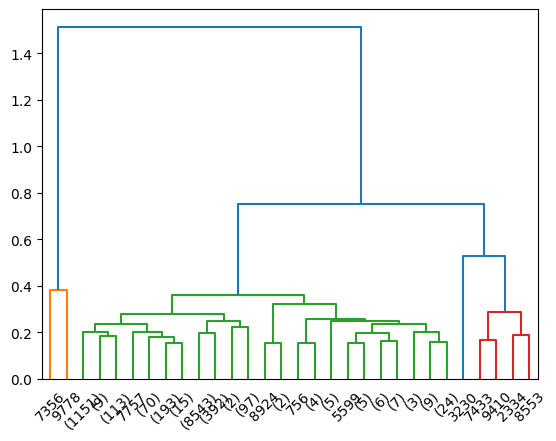

In [95]:
data_link_three = linkage(data_dist, method='average', metric='euclidean')
res3 = dendrogram(data_link_three, color_threshold=0.5, truncate_mode='lastp')

In [96]:
cluster3 = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='average')  
cluster3.fit_predict(df_norm)

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

The silhouette score is: 0.7857185179247486


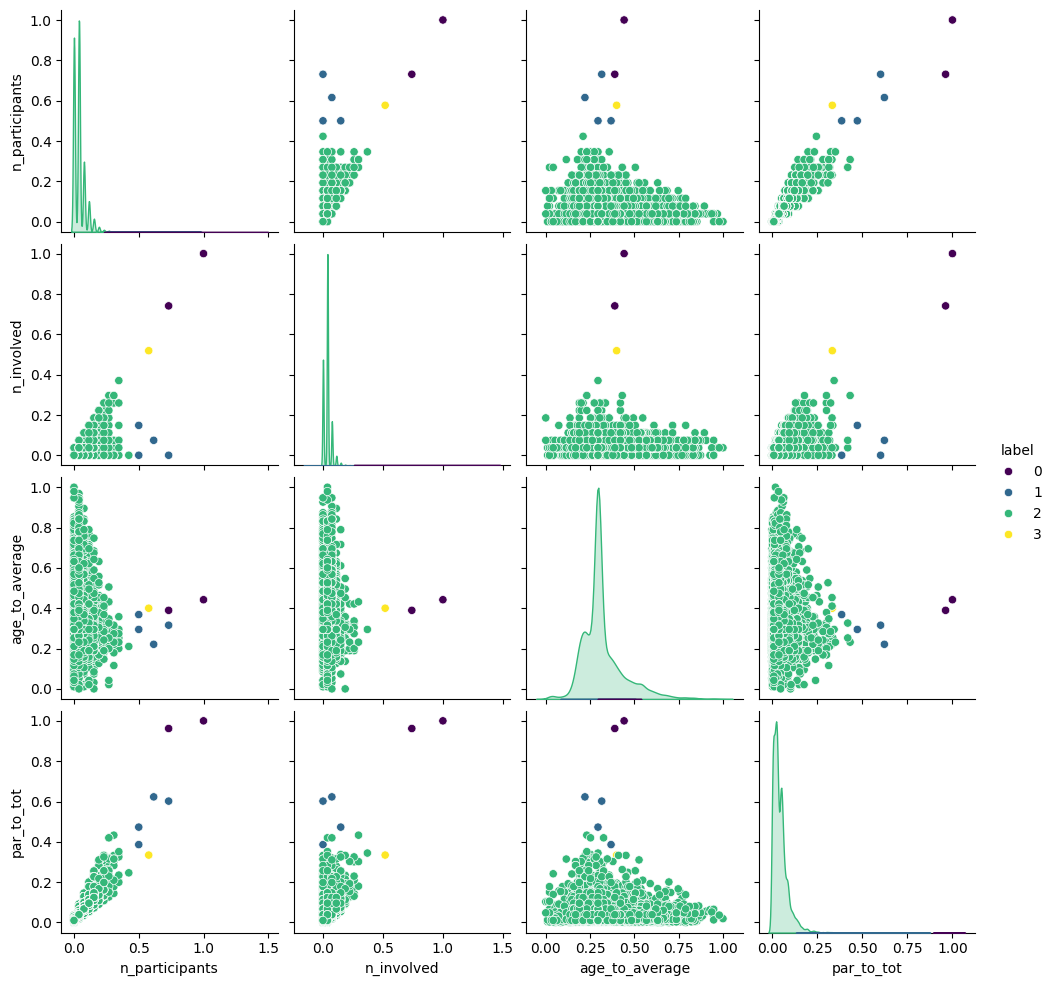

In [97]:
# Get cluster labels
cluster_labels = cluster3.labels_

# Compute silhouette score
silhouette_avg = silhouette_score(df_norm, cluster_labels)
print("The silhouette score is:", silhouette_avg)
ndf['label'] = cluster_labels
sns.pairplot(ndf, hue='label', palette='viridis')
plt.show()

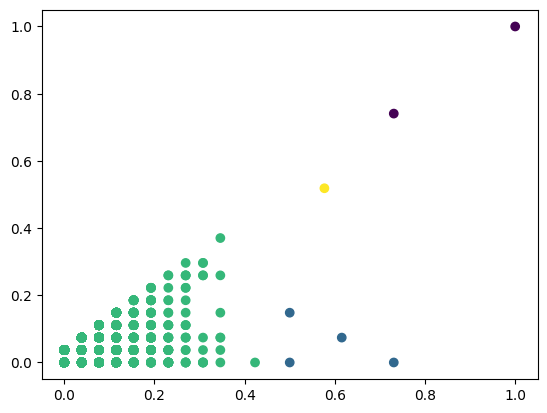

In [98]:
cluster3.fit_predict(df_norm)
plt.scatter(ndf['n_participants'], ndf['n_involved'], c=cluster3.labels_)

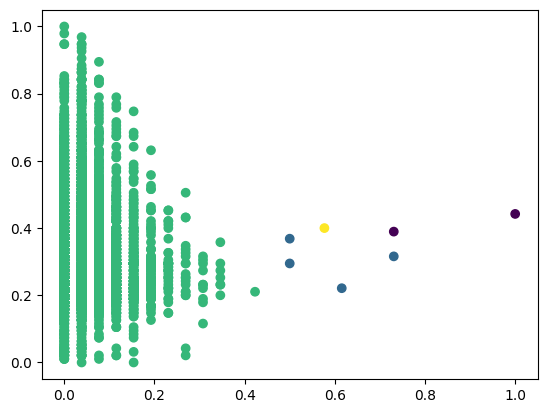

In [99]:
cluster3.fit_predict(df_norm)
plt.scatter(ndf['n_participants'], ndf['age_to_average'], c=cluster3.labels_)

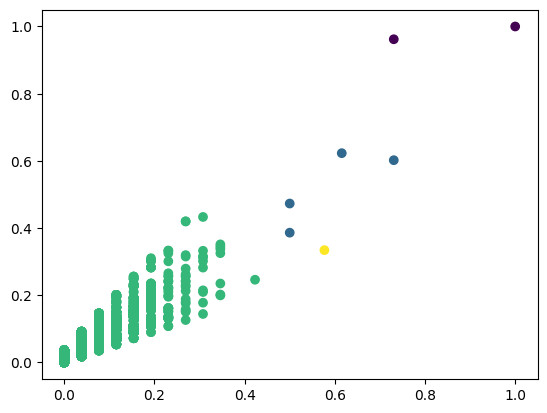

In [78]:
cluster3.fit_predict(df_norm)
plt.scatter(ndf['n_participants'], ndf['par_to_tot'], c=cluster3.labels_)

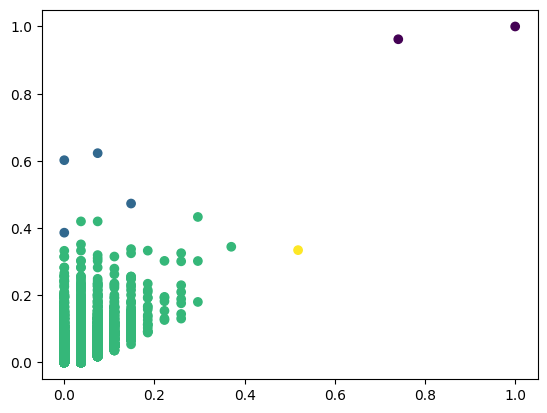

In [79]:
cluster3.fit_predict(df_norm)
plt.scatter(ndf['n_involved'], ndf['par_to_tot'], c=cluster3.labels_)

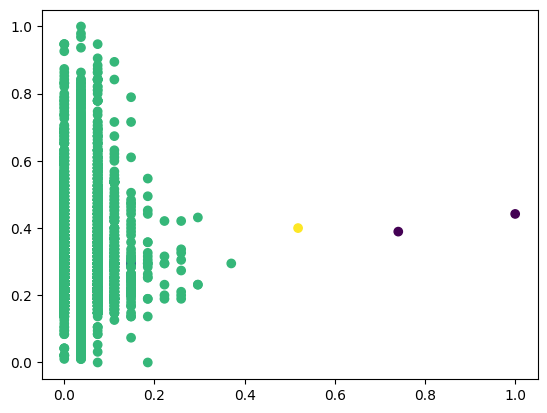

In [80]:
cluster3.fit_predict(df_norm)
plt.scatter(ndf['n_involved'], ndf['age_to_average'], c=cluster3.labels_)

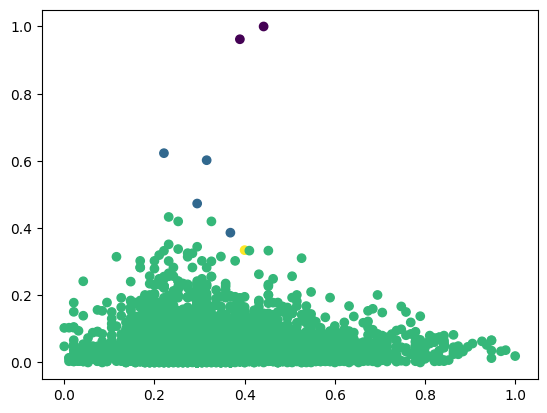

In [81]:
cluster3.fit_predict(df_norm)
plt.scatter(ndf['age_to_average'], ndf['par_to_tot'], c=cluster3.labels_)

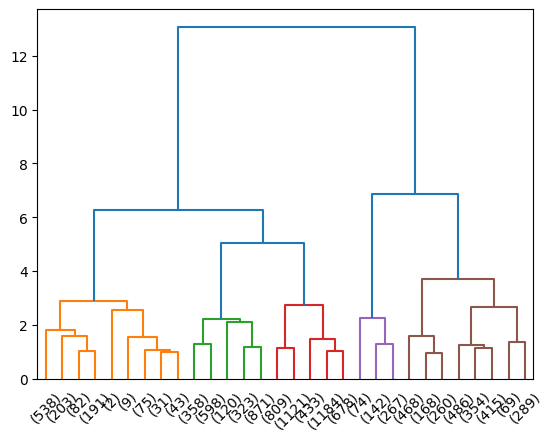

In [82]:
data_link_four = linkage(data_dist, method='ward', metric='euclidean')
res = dendrogram(data_link_four, color_threshold=4.0, truncate_mode='lastp')

In [83]:
cluster4 = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')  
cluster4.fit_predict(df_norm)

array([0, 2, 3, ..., 1, 0, 3], dtype=int64)

The silhouette score is: 0.3049165696291105


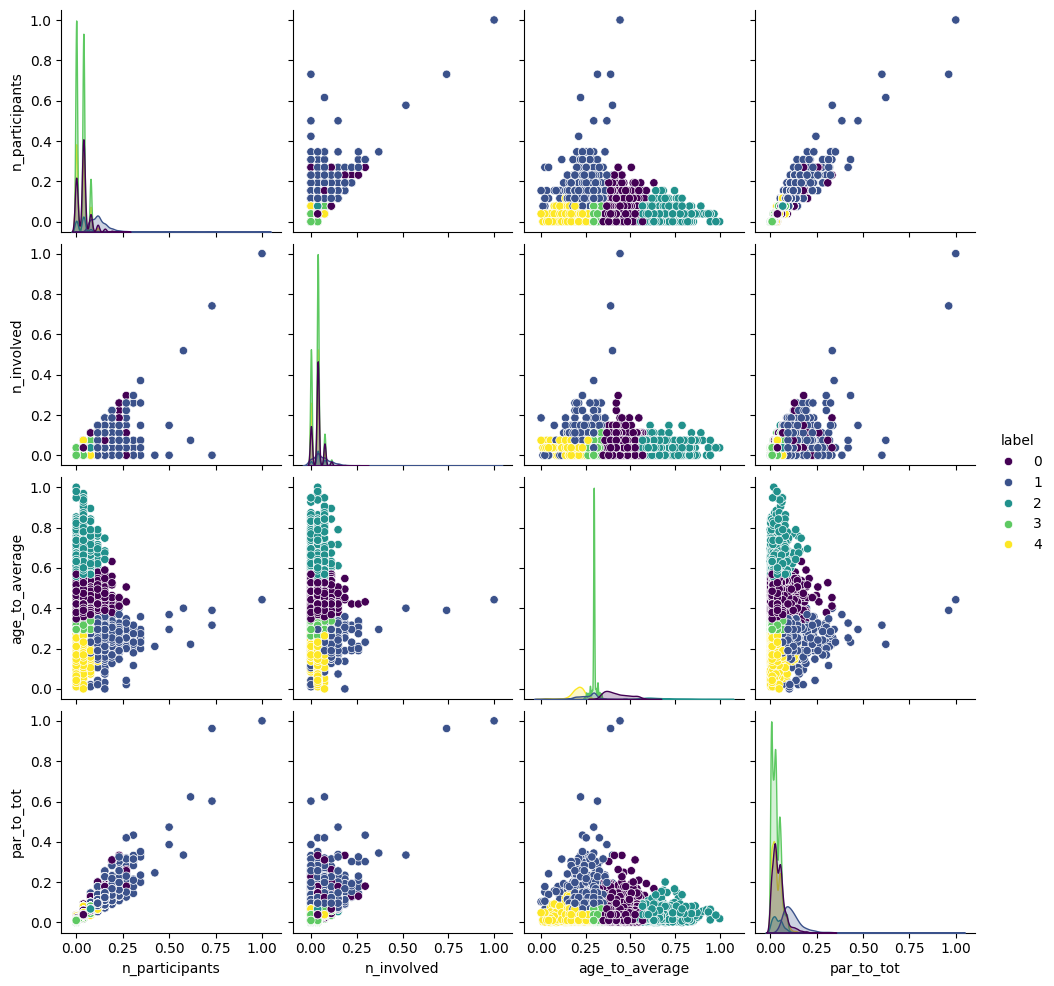

In [100]:
# Get cluster labels
cluster_labels = cluster4.labels_

# Compute silhouette score
silhouette_avg = silhouette_score(df_norm, cluster_labels)
print("The silhouette score is:", silhouette_avg)
ndf['label'] = cluster_labels
sns.pairplot(ndf, hue='label', palette='viridis')
plt.show()

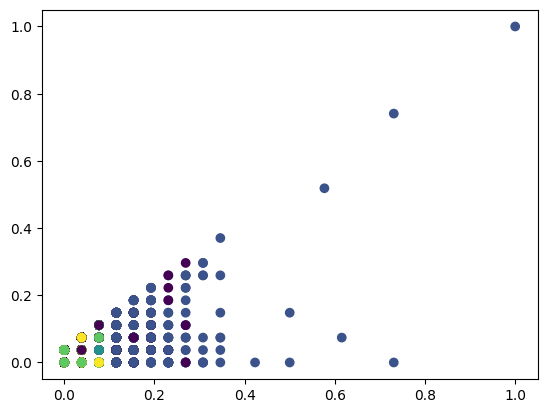

In [84]:
cluster4.fit_predict(df_norm)
plt.scatter(ndf['n_participants'], ndf['n_involved'], c=cluster4.labels_)

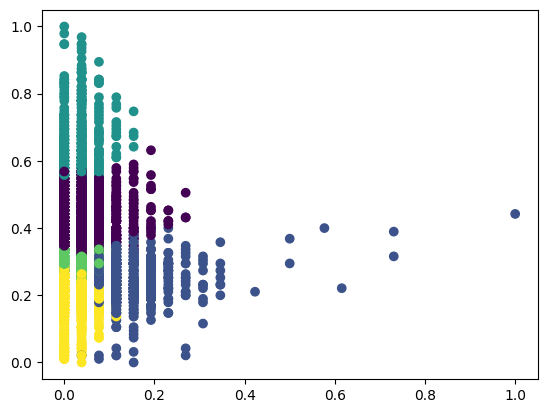

In [85]:
cluster4.fit_predict(df_norm)
plt.scatter(ndf['n_participants'], ndf['age_to_average'], c=cluster4.labels_)

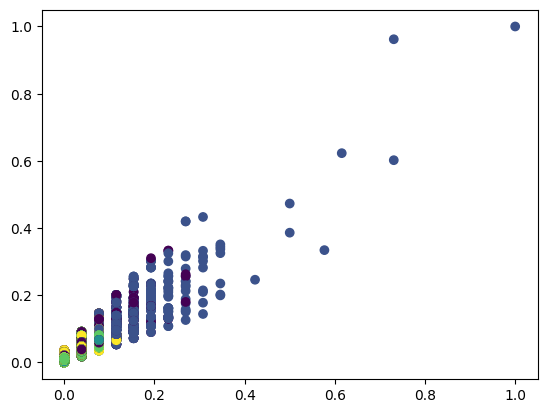

In [86]:
cluster4.fit_predict(df_norm)
plt.scatter(ndf['n_participants'], ndf['par_to_tot'], c=cluster4.labels_)

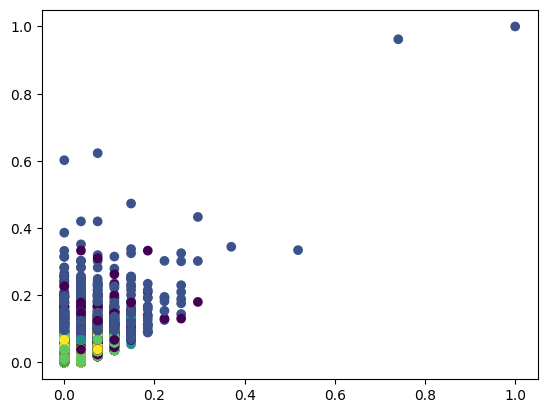

In [87]:
cluster4.fit_predict(df_norm)
plt.scatter(ndf['n_involved'], ndf['par_to_tot'], c=cluster4.labels_)

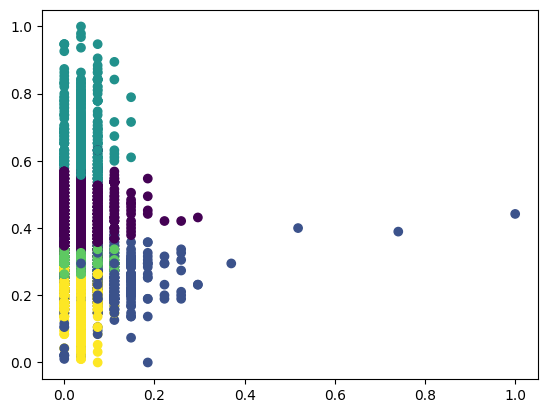

In [88]:
cluster4.fit_predict(df_norm)
plt.scatter(ndf['n_involved'], ndf['age_to_average'], c=cluster4.labels_)

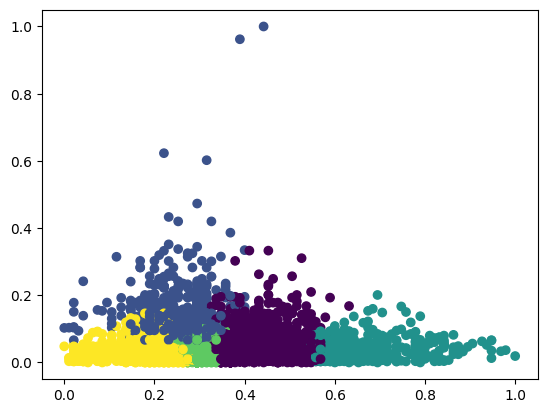

In [89]:
cluster4.fit_predict(df_norm)
plt.scatter(ndf['age_to_average'], ndf['par_to_tot'], c=cluster4.labels_)